In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv("D:/GL/formations/gomycode/Titanic.csv")
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
import numpy as np
x=df['Fare'].values[:,np.newaxis]
y=df['Survived'].values[:,np.newaxis]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)



In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
print('accurancy={:.2f}'.format(logreg.score(x_test,y_test)))

accurancy=0.65


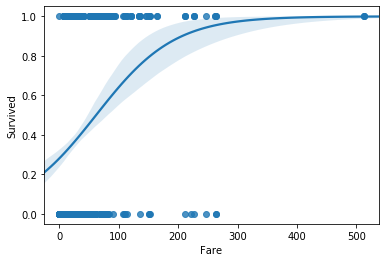

In [34]:
import seaborn as sns
sns.regplot(x='Fare',y='Survived',data=df,logistic=True)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       160
           1       0.68      0.25      0.36       108

    accuracy                           0.65       268
   macro avg       0.66      0.58      0.56       268
weighted avg       0.66      0.65      0.60       268



In [37]:
import pandas as pd
y_test=np.hstack(y_test)#to coonvet y_test to 1D data
y_predict=np.hstack(y_predict)
confusion_matrix =pd.crosstab(y_test,y_predict, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0   1
Actual            
0          147  13
1           81  27


In [ ]:
here we can see that the higher value in our table is 


    ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
    Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
    ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
auc = roc_auc_score(y_test,y_predict)
print('AUC: %.2f' % auc)

AUC: 0.58


In [ ]:
having an accuracy is 0.58<0.9 shows as that our model is underfitting

In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

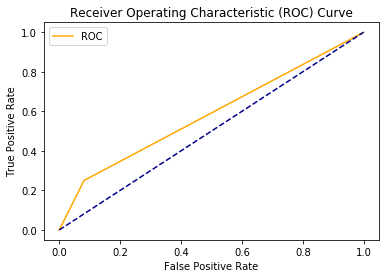

In [29]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plot_roc_curve(fpr, tpr)

AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets.

ROC summarizes all of the confusion matrices thet each threshold produced.it makes it easy to identify the best threshold
AUC used to compare one ROC curve to another,it is useful to decide wich categorization method is better.
the ROC with the grater AUC is better